In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os 
from astropy import units as u
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import SplineInterpolatedResampler
import scipy.signal
import lineid_plot
from PyAstronomy import pyasl

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
path = '/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less'

In [3]:
for root, directories, files in os.walk(path, topdown=False):

    for name in files:
        print(os.path.join(root, name))

/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7337/spec-7337-56662-0040.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/10659/spec-10659-58161-0810.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7243/spec-7243-56629-0626.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/9607/spec-9607-58085-0030.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/8839/spec-8839-57846-0386.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7027/spec-7027-56448-0390.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/.DS_Store


In [4]:
f1 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7337/spec-7337-56662-0040.fits')
f2 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/10659/spec-10659-58161-0810.fits')
f3 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7243/spec-7243-56629-0626.fits')
f4 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/9607/spec-9607-58085-0030.fits')
f5 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/8839/spec-8839-57846-0386.fits')
f6 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7027/spec-7027-56448-0390.fits')

In [5]:
def smooth_spec(lamb, flux, fluxhat):
    
    pk = lineid_plot.initial_plot_kwargs()
    pk['color'] = "red"
    line_wave = [4862.68, 6563]
    line_label = ['H\u03B2', 'H\u03B1']
    line_wave1 = [3346.79, 3426.85, 3727.092, 3729.875, 3889.0, 4072.3, 4102.89, 4341.68, 4364.436, 4862.68, 4932.603, 4960.295, 5008.240, 6302.046, 6365.536, 6529.03, 6549.86, 6564.61, 6585.27, 6718.29, 6732.67]
    line_label1 = ['Ne V', 'Ne VI', 'O II', 'O II', 'He I', 'S II', 'H\u0394', 'H\u03B3', 'O III', 'H\u03B2', 'O III', 'O III', 'O III', 'O I', 'O I', 'N I', 'N II', 'H\u03B1', 'N II', 'S II', 'S II']
    
    plt.style.use('grayscale')
    f, ax = plt.subplots(figsize=(12, 6)) 
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel('R-Frame Wavelength ($\AA$)')
    plt.ylabel('erg/s/$cm^2$/Ang')
    plt.title('K_Size=3:  '+plate, loc='right')
    ax.step(lamb[np.where(snr > 0)], fluxhat1[np.where(snr > 0)], c='k')
    lineid_plot.plot_line_ids(lamb, fluxhat, line_wave, line_label, ax=ax, plot_kwargs=pk)
    
    #Smoothed spectra
    plt.style.use('grayscale')
    f, ax = plt.subplots(figsize=(12, 6)) 
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel('R-Frame Wavelength ($\AA$)')
    plt.ylabel('erg/s/$cm^2$/Ang')
    plt.title('K_Size=5:  '+plate, loc='right')
    ax.step(lamb[np.where(snr > 0)], fluxhat[np.where(snr > 0)], c='k')
    lineid_plot.plot_line_ids(lamb, fluxhat, line_wave, line_label, ax=ax, plot_kwargs=pk)
    
    return

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


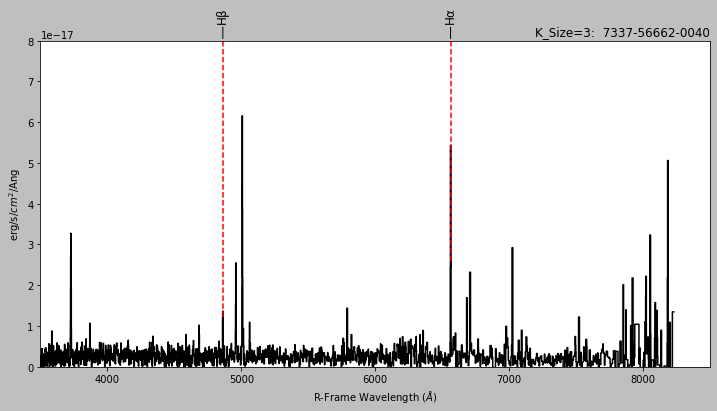

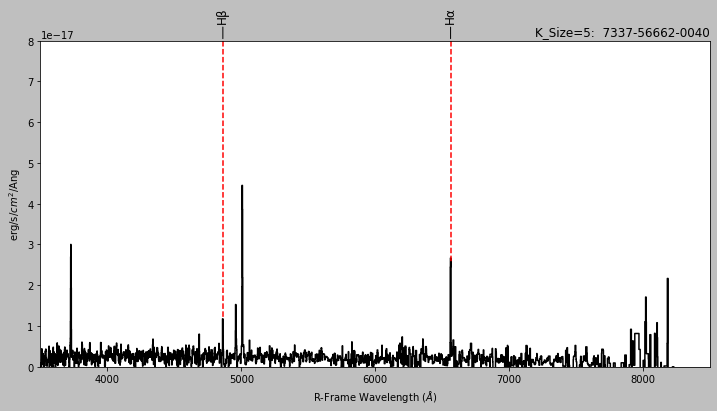

In [8]:
z = f1[2].data['z']
lamb = (10**f1[1].data['loglam']* u.AA)/(1+z)
flux = f1[1].data['flux']
err = np.sqrt(1/f1[1].data['ivar'])
plate = '7337-56662-0040'

ylim = (0, 8*10**-17)
xlim = (3500, 8500)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


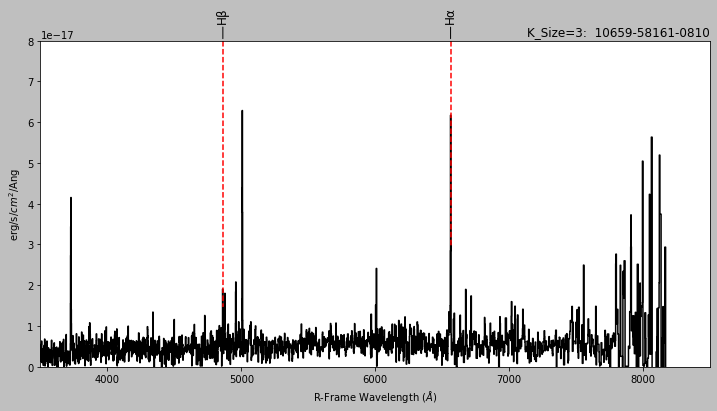

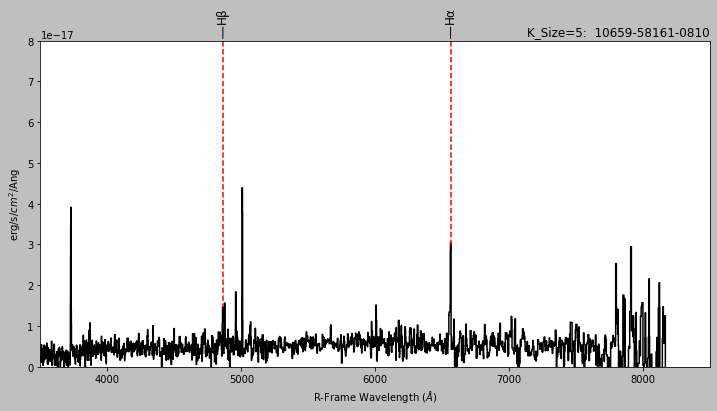

In [9]:
z = f2[2].data['z']
lamb = (10**f2[1].data['loglam']* u.AA)/(1+z)
flux = f2[1].data['flux']
err = np.sqrt(1/f2[1].data['ivar'])
plate = '10659-58161-0810'

ylim = (0, 8*10**-17)
xlim = (3500, 8500)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


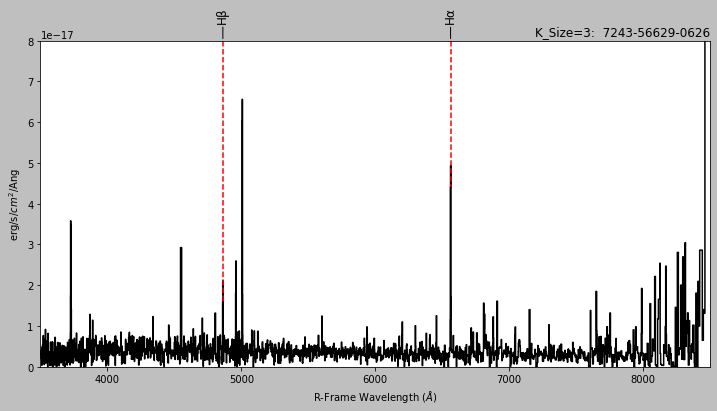

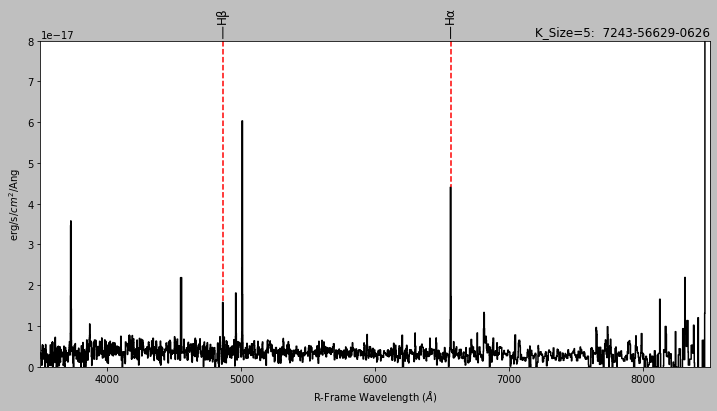

In [10]:
z = f3[2].data['z']
lamb = (10**f3[1].data['loglam']* u.AA)/(1+z)
flux = f3[1].data['flux']
err = np.sqrt(1/f3[1].data['ivar'])
plate = '7243-56629-0626'

ylim = (0, 8*10**-17)
xlim = (3500, 8500)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


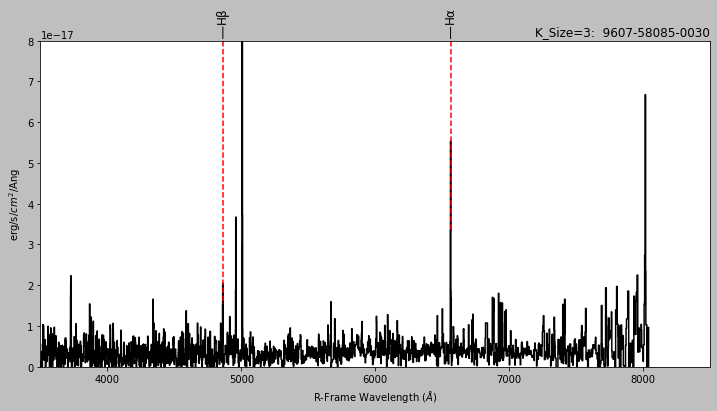

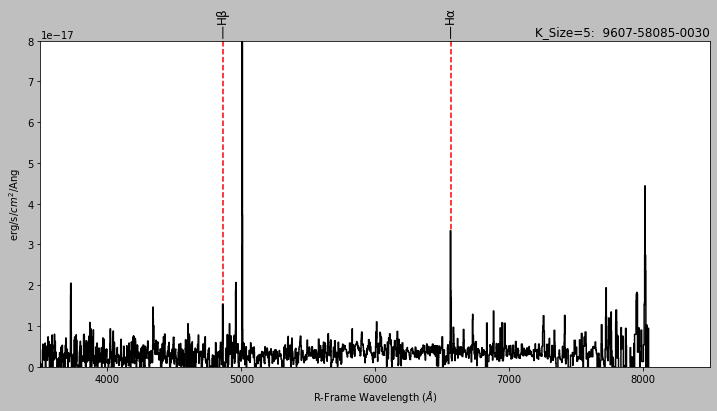

In [11]:
z = f4[2].data['z']
lamb = (10**f4[1].data['loglam']* u.AA)/(1+z)
flux = f4[1].data['flux']
err = np.sqrt(1/f4[1].data['ivar'])
plate = '9607-58085-0030'

ylim = (0, 8*10**-17)
xlim = (3500, 8500)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


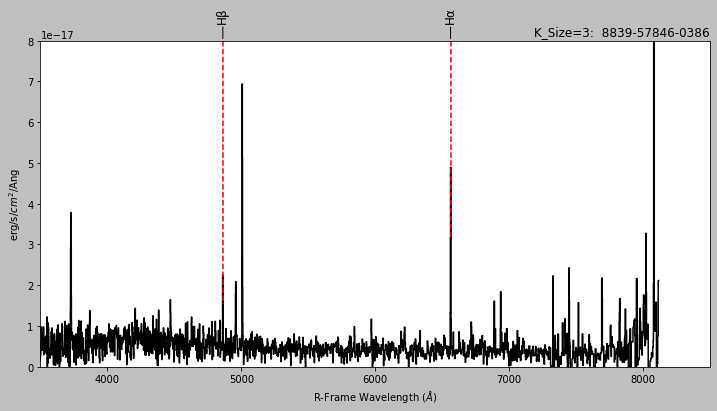

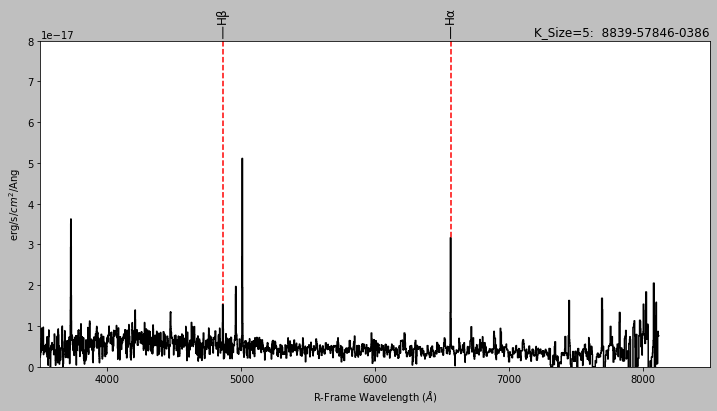

In [12]:
z = f5[2].data['z']
lamb = (10**f5[1].data['loglam']* u.AA)/(1+z)
flux = f5[1].data['flux']
err = np.sqrt(1/f5[1].data['ivar'])
plate = '8839-57846-0386'

ylim = (0, 8*10**-17)
xlim = (3500, 8500)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


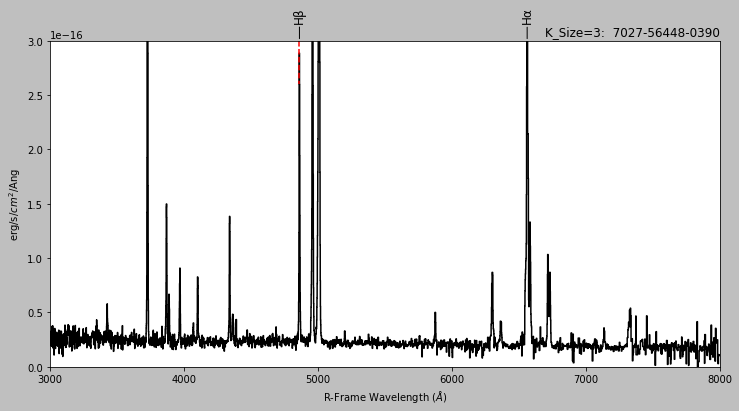

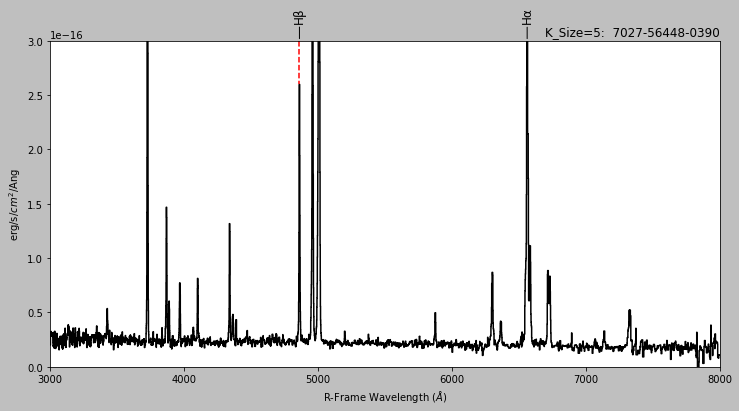

In [16]:
z = f6[2].data['z']
lamb = (10**f6[1].data['loglam']* u.AA)/(1+z)
flux = f6[1].data['flux']
err = np.sqrt(1/f6[1].data['ivar'])
plate = '7027-56448-0390'

ylim = (0, 30*10**-17)
xlim = (3000, 8000)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)